<a href="https://colab.research.google.com/github/sachith1234/k12/blob/master/MNIST_Hand_Written_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.keras as tf
import numpy as np

In [ ]:
mnist = tf.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
len(xtrain)

60000

In [ ]:
xtrain.shape

(60000, 28, 28)

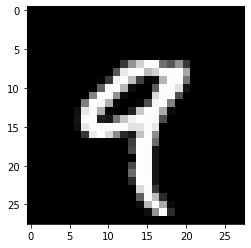

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[4],cmap='gray')
plt.show()

In [ ]:
ytrain[4]

9

In [ ]:
xtrain[4].shape

(28, 28)

In [ ]:
### Artificial Neural Network

In [ ]:
## Create the model
model = tf.models.Sequential()  ## blank nn with no layers
## add the layers
model.add(tf.layers.Flatten())   ## input layer
model.add(tf.layers.Dense(784,activation="relu"))     ## hidden layer (28*28)
model.add(tf.layers.Dense(10,activation = "softmax")) ### output layer

In [ ]:
### Configure the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
## scale the data
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
xtrain[4]

In [ ]:
#### train the model
model.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1908 - accuracy: 0.9437
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0764 - accuracy: 0.9768
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0484 - accuracy: 0.9852
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0339 - accuracy: 0.9891
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0261 - accuracy: 0.9914
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0215 - accuracy: 0.9929
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0190 - accuracy: 0.9937
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0128 - accuracy: 0.9956
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0127 - accuracy: 0.9962
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - l

In [ ]:
### Prediction
ypred = model.predict(xtest)

In [ ]:
ytest[200]

3

In [ ]:
ypred[200]

array([1.4904142e-18, 2.3421427e-16, 2.5733211e-09, 1.0000000e+00,
       1.4684916e-22, 1.8956592e-11, 2.9658493e-20, 4.5961654e-16,
       1.5635850e-08, 2.0462458e-16], dtype=float32)

In [ ]:
np.argmax(ypred[200])

3

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.1211 - accuracy: 0.9793


[0.1210571750998497, 0.9793000221252441]

In [ ]:
#counting faces
import cv2
cam = cv2.VideoCapture(0)   ## 0 - default webcam
face_cascade = cv2.CascadeClassifier('face.xml')
count=0
while True:
    ret,img = cam.read()
    faces = face_cascade.detectMultiScale(img,1.5)
    for x,y,w,h in faces:
        p1 = (x,y)
        p2 = (x+w,y+h)
        color = (255,0,0)
        cv2.rectangle(img,p1,p2,color,3)
        count = "No. of faces = "+str(len(faces))
        cv2.putText(img,count,(100,200),cv2.FONT_HERSHEY_DUPLEX,2.5,(0,0,255),3)
        print(count)
        cv2.imshow("Webcam",img)
    if cv2.waitKey(1) == 13:     ### 13 - ASCII Code for enter
        break
cam.release()
cv2.destroyAllWindows()
